In [290]:
import requests
from requests.auth import HTTPBasicAuth

from io import StringIO
import time
import pandas as pd

import matplotlib.pyplot as plt

In [291]:
IP = "192.168.1.29"
USER = "root"
PASSWORD = "root"
TIMEZONE_OFFSET = (time.localtime().tm_hour - time.gmtime().tm_hour) * 3600

def get_day_data_url(day_number):
    return "http://" + IP + "/arch/2020/07/ARCH" + str(day_number).zfill(2) + ".CSV"

def process_day_data(day_data):
    day_data = day_data.decode()
    day_data = StringIO(day_data)
    day_data = pd.read_csv(day_data, ";")
    # day_data.datetime = pd.to_datetime(day_data.datetime + TIMEZONE_OFFSET, unit="s") # convert dates
    day_data = day_data.iloc[:, :-1] # remove last unnamed column
    return day_data

def download_data(fist_day, last_day):
    days_data = []
    for i in range(fist_day, last_day + 1):
        try:
            print("Downloading day", i, "\t", end="")
            response = requests.get(get_day_data_url(i), auth=HTTPBasicAuth(USER, PASSWORD), timeout=1)
            response.raise_for_status()
            day_data = process_day_data(response.content)
            days_data.append(day_data)
            print(day_data.shape[0] - 1, "lines")
        except requests.exceptions.HTTPError as e:
            print(e)
        except requests.exceptions.Timeout:
            print("Timeout!")
        except requests.exceptions.RequestException as e:
            print("Unexpected error occured!:", e)
    return days_data


In [302]:
a = download_data(0,10)

In [298]:
a[-1].rename(columns={"datetime":"d"}, inplace=True)

In [328]:
a[-1].loc[(a[-1].datetime >= 1594166520)]

,datetime,tkot_value,tpow_value,tpod_value,tcwu_value,twew_value,tzew_value,t1_value,t2_value,tsp_value,...,ob5_zaw4d_tzad,ob5_zaw4d_pos,ob5_t1,ob5_t2,ob6_pok_tact,ob6_pok_tzad,ob6_zaw4d_tzad,ob6_zaw4d_pos,ob6_t1,ob6_t2
2,1594166520,56.98,51.31,38.98,53.80,24.35,17.09,28.70,NaN,50.95,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,1594166580,57.02,51.32,39.04,53.81,24.35,17.06,28.71,NaN,50.83,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,1594166640,57.04,51.36,39.10,53.85,24.36,17.06,28.72,NaN,50.58,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5,1594166700,57.04,51.39,39.15,53.86,24.34,17.06,28.70,NaN,50.49,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
6,1594166760,57.09,51.41,39.21,53.91,24.35,17.06,28.71,NaN,50.33,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1594236900,53.80,47.35,35.21,54.14,25.08,17.60,47.58,NaN,65.33,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1176,1594236960,53.78,47.47,35.03,54.13,25.08,17.60,47.58,NaN,65.70,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1177,1594237020,53.75,47.63,34.85,54.13,25.09,17.60,47.58,NaN,65.98,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1178,1594237080,53.75,47.74,34.68,54.12,25.10,17.60,47.57,NaN,66.43,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [233]:
labels = ["datetime", "Temperatura kotła", "Temperatura powrotu", "Temperatura podajnika", "Temperatura CWU", "", "Temperatura zewnętrzna", ""]

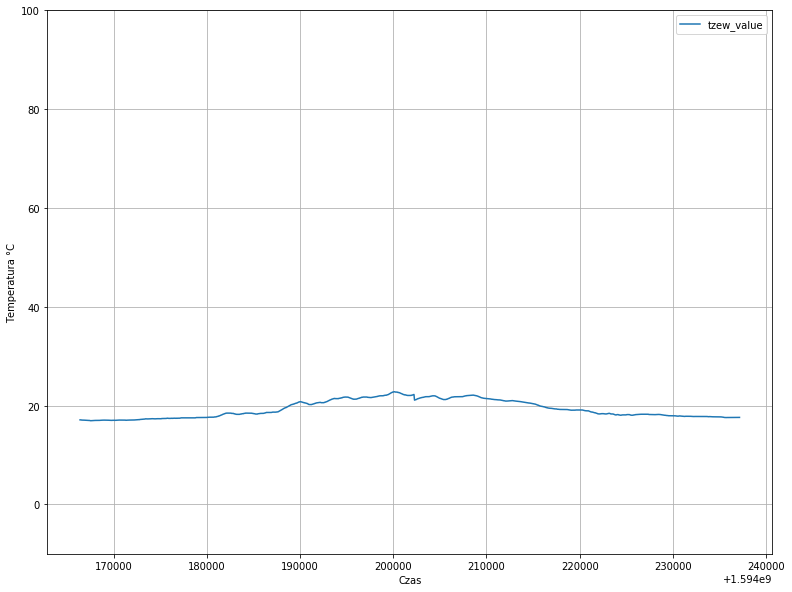

In [325]:
plt.figure(figsize=(13, 10))
plt.xlabel("Czas")
plt.ylabel("Temperatura °C")
plt.ylim([-10, 100])
plt.grid()
#for i in range(1, 15): # a[-1].shape[1]
#    if not pd.isnull(a[-1].iloc[0, i]):
#        plt.plot(a[-1].iloc[:, 0], a[-1].iloc[:, i], label=a[-1].columns[i])
plt.plot(a[-1].iloc[:, 0], a[-1].iloc[:, 6], label=a[-1].columns[6])
plt.legend()